In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define paths to your datasets
train_dir = '/content/drive/MyDrive/Data/Train'
test_dir = '/content/drive/MyDrive/Data/Test'
val_dir = '/content/drive/MyDrive/Data/Validation'

In [ ]:
# Image preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Loading and augmenting images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 1351 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


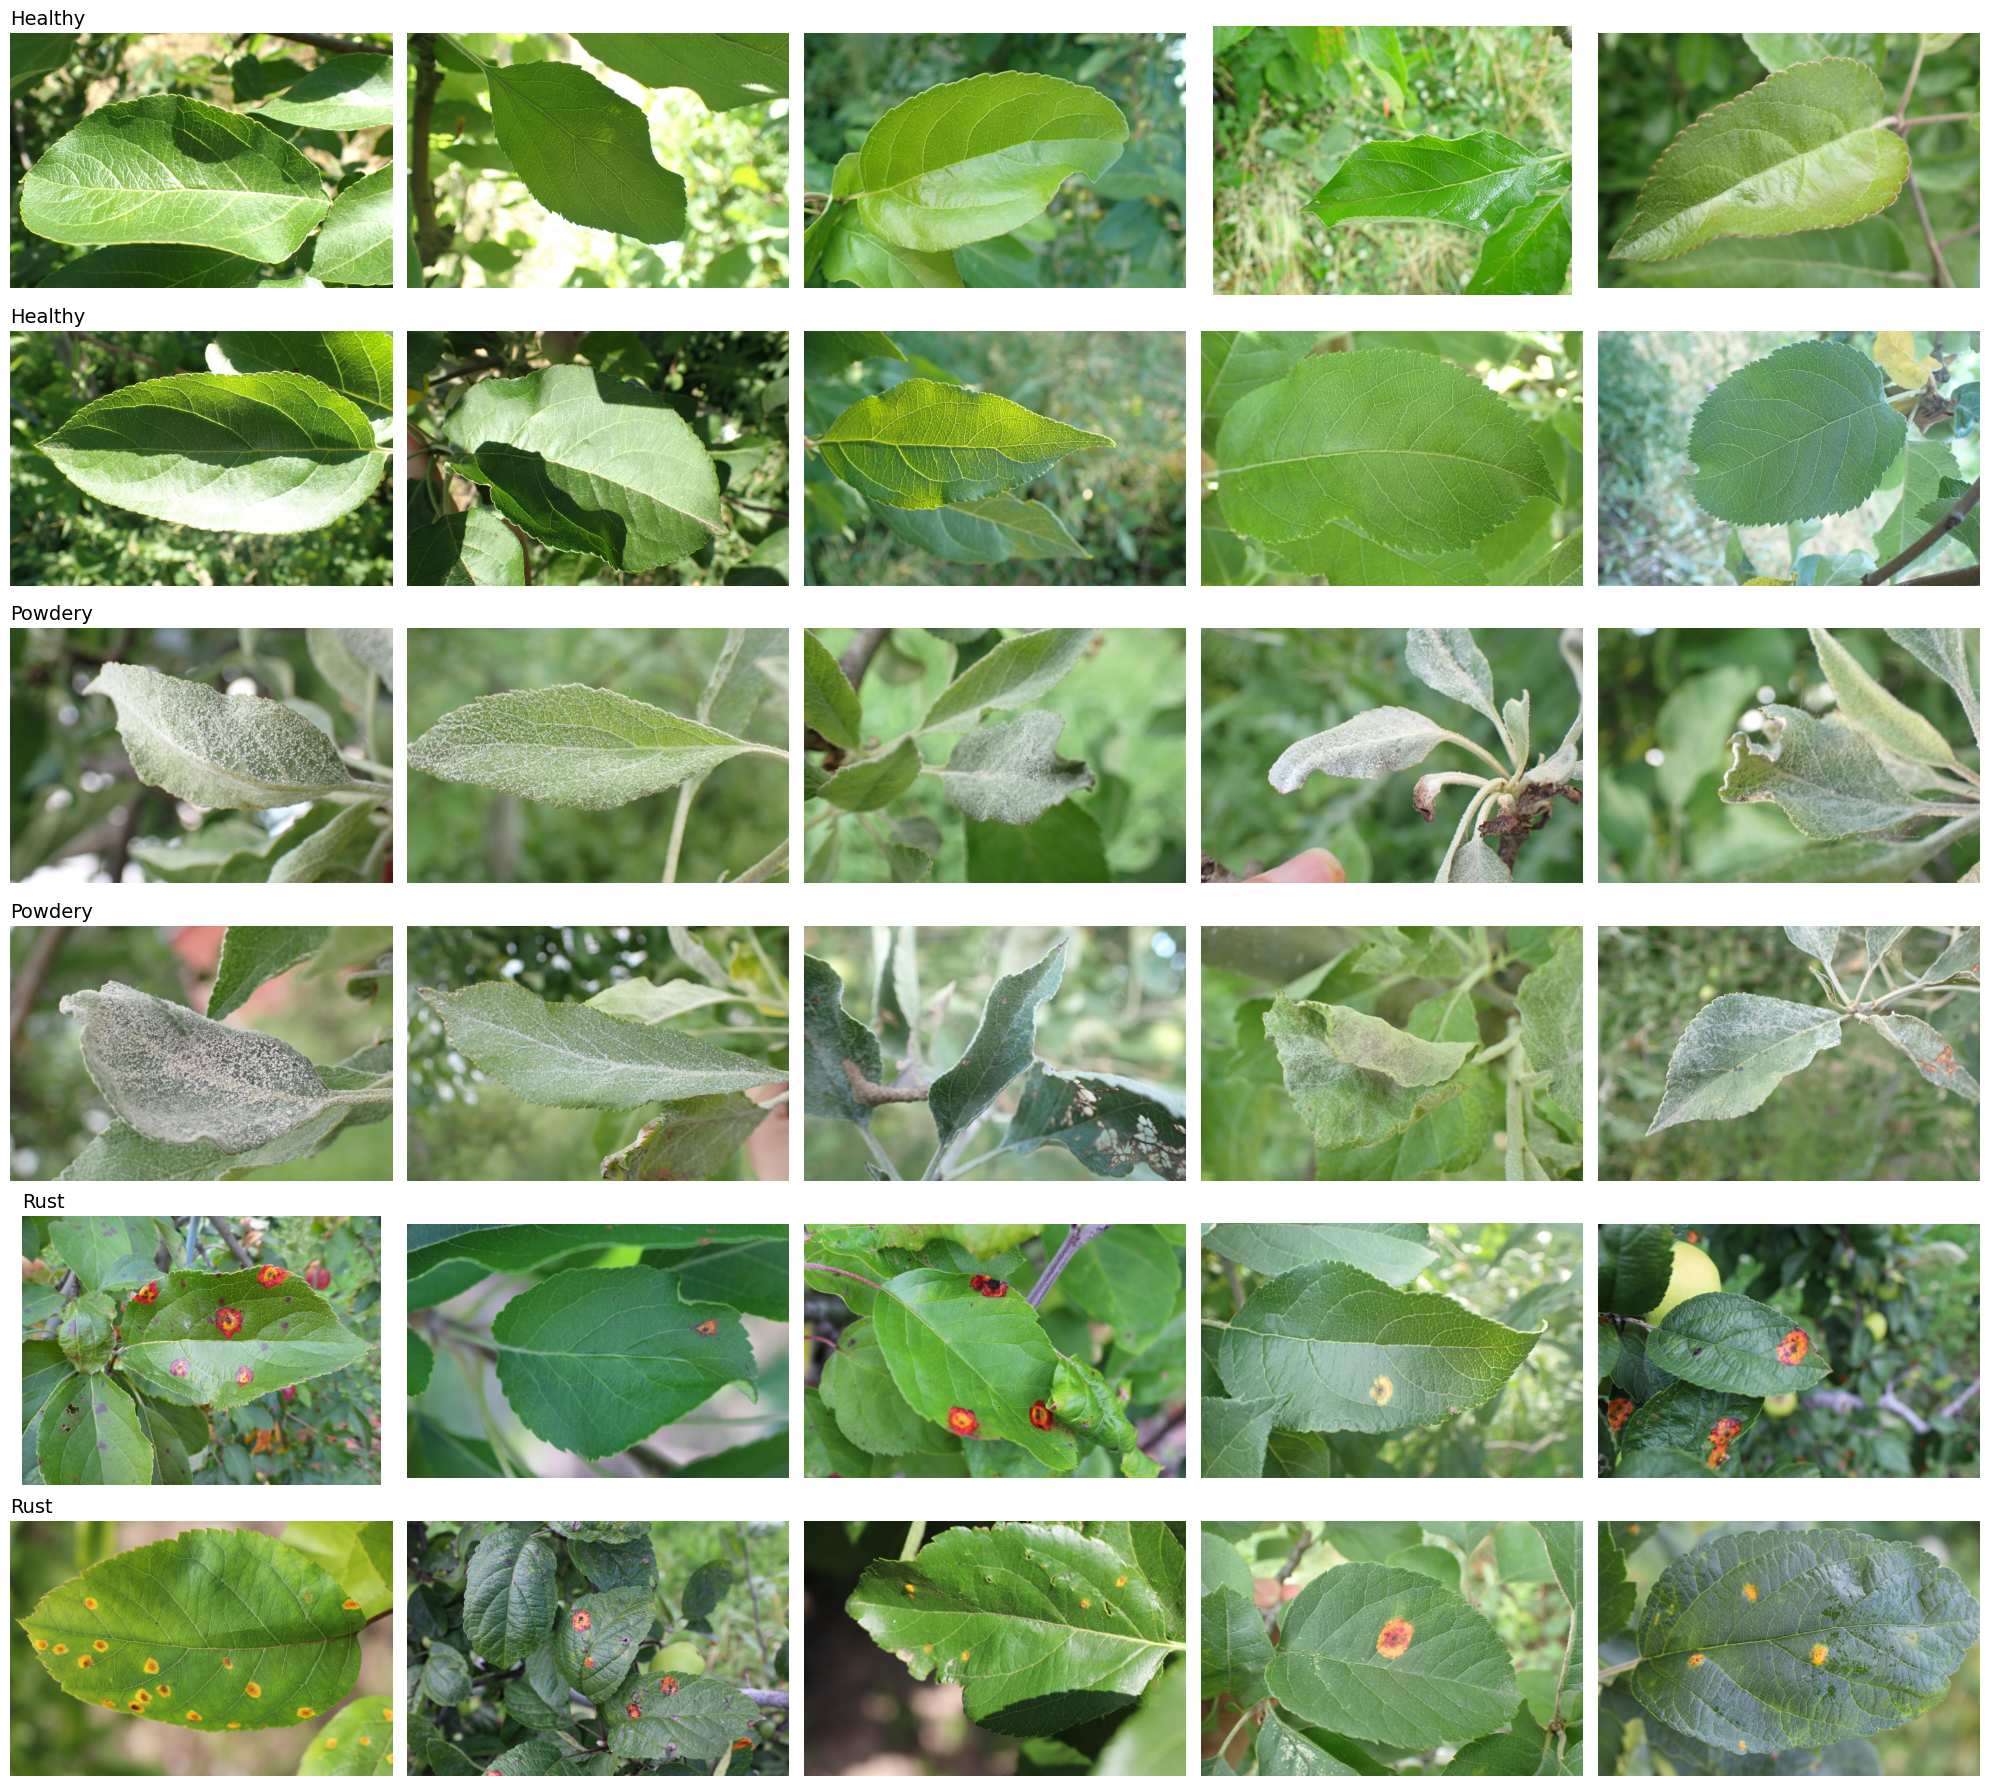

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Visualization function
def visualize_data(train_dir, categories, num_images=10, images_per_row=5):
    rows = len(categories) * (num_images // images_per_row)  # Calculate total rows
    plt.figure(figsize=(20, rows * 3))  # Adjust figure size based on rows

    img_index = 1  # For subplot index
    for category in categories:
        category_path = os.path.join(train_dir, category)  # Path to category folder
        image_files = os.listdir(category_path)[:num_images]  # Get first 'num_images' files

        for img_file in image_files:
            img_path = os.path.join(category_path, img_file)
            img = Image.open(img_path)

            # Subplot
            plt.subplot(rows, images_per_row, img_index)
            plt.imshow(img)
            plt.axis('off')
            if img_index % images_per_row == 1:  # Add category title only at the start of a row
                plt.title(category, fontsize=14, loc='left')
            img_index += 1

    plt.tight_layout()
    plt.show()

# Call the function
categories = ['Healthy', 'Powdery', 'Rust']
train_dir = "/content/drive/MyDrive/Data/Train"  # Update with actual train directory path
visualize_data(train_dir, categories)

In [ ]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # 3 output classes: Healthy, Powdery, Rust
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=[early_stopping])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.3883 - loss: 1.7318 - val_accuracy: 0.4688 - val_loss: 0.9152
Epoch 2/30
 1/42 ━━━━━━━━━━━━━━━━━━━━ 1:44 3s/step - accuracy: 0.5312 - loss: 0.9406

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5312 - loss: 0.9406 - val_accuracy: 0.5000 - val_loss: 0.9232
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 180s 4s/step - accuracy: 0.6066 - loss: 0.8073
Epoch 4/30


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.6250 - loss: 0.8258 - val_accuracy: 0.6562 - val_loss: 0.6919
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 177s 4s/step - accuracy: 0.7023 - loss: 0.6926 - val_accuracy: 0.7857 - val_loss: 0.5279
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - accuracy: 0.8125 - loss: 0.6254
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.7743 - loss: 0.5818 - val_accuracy: 0.8125 - val_loss: 0.3794
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9375 - loss: 0.3558 - val_accuracy: 0.7500 - val_loss: 0.6651
Epoch 9/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 182s 4s/step - accuracy: 0.8607 - loss: 0.4080
Epoch 10/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.8125 - loss: 0.3737 - val_accuracy: 0.8125 - val_loss: 0.5225
Epoch 11/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 170s 4s/step - accuracy: 0.8691 - loss: 0.3934 - val_accuracy: 0.8571 - val_loss: 0.2850
Epoch 12/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 657us/step - accuracy: 0.8750 - lo

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 8s/step - accuracy: 0.9219 - loss: 0.4540
Test Accuracy: 93.75%


5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step
Confusion Matrix:
[[22 14 14]
 [15 13 22]
 [23 14 13]]


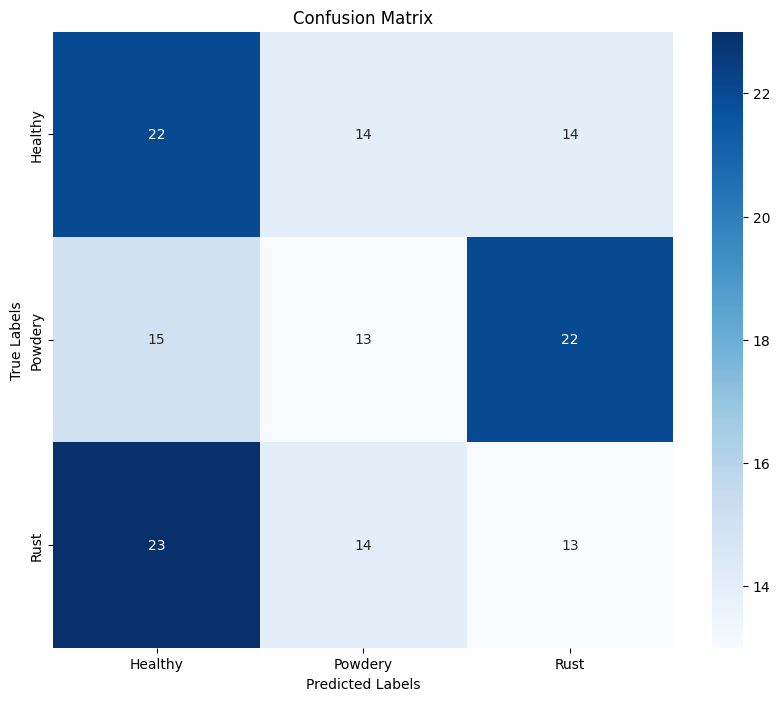


Classification Report:
              precision    recall  f1-score   support

     Healthy       0.37      0.44      0.40        50
     Powdery       0.32      0.26      0.29        50
        Rust       0.27      0.26      0.26        50

    accuracy                           0.32       150
   macro avg       0.32      0.32      0.32       150
weighted avg       0.32      0.32      0.32       150



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the test generator is reset before predictions to avoid missing data
test_generator.reset()

# Make predictions on the test set
predictions = model.predict(test_generator,
                            steps=test_generator.samples // test_generator.batch_size + 1,
                            verbose=1)

# Convert predicted probabilities to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Retrieve true labels and class labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

# Classification Report
print("\nClassification Report:")
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step
              precision    recall  f1-score     support
Healthy        0.400000  0.480000  0.436364   50.000000
Powdery        0.390244  0.320000  0.351648   50.000000
Rust           0.367347  0.360000  0.363636   50.000000
accuracy       0.386667  0.386667  0.386667    0.386667
macro avg      0.385864  0.386667  0.383883  150.000000
weighted avg   0.385864  0.386667  0.383883  150.000000


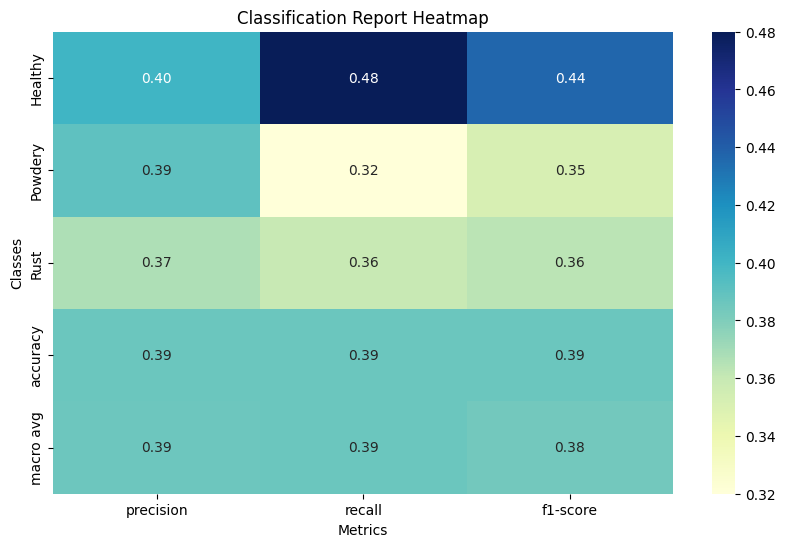

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the test generator is reset before predictions to avoid missing data
test_generator.reset()

# Make predictions on the test set
predictions = model.predict(test_generator,
                            steps=test_generator.samples // test_generator.batch_size + 1,
                            verbose=1)

# Convert predicted probabilities to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Retrieve true labels and class labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)

# Convert the classification report to a pandas DataFrame
report_df = pd.DataFrame(report).transpose()

# Display the DataFrame
print(report_df)

# Visualize the Classification Report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.ylabel("Classes")
plt.xlabel("Metrics")
plt.show()